In [44]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

SEQ_LEN=60
# DO_PLOT=False
DO_PLOT=True

In [45]:
model=load_model("./models/PRED-1592157754_model-uber.h5")

# print(model)
url = "./datasets/DAT_ASCII_EURUSD_M1_2017.csv"
df = pd.read_csv(url, names=list(["date","open", "high", "low", "close", "volume"]), header=None, sep=";")
df.drop("volume", 1, inplace=True)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace=True)

df.head()

,open,high,low,close
date,,,,
2017-01-02 02:00:00,1.05155,1.05197,1.05155,1.05190
2017-01-02 02:01:00,1.05209,1.05209,1.05177,1.05179
2017-01-02 02:02:00,1.05177,1.05198,1.05177,1.05178
2017-01-02 02:03:00,1.05188,1.05200,1.05188,1.05200
2017-01-02 02:04:00,1.05196,1.05204,1.05196,1.05203


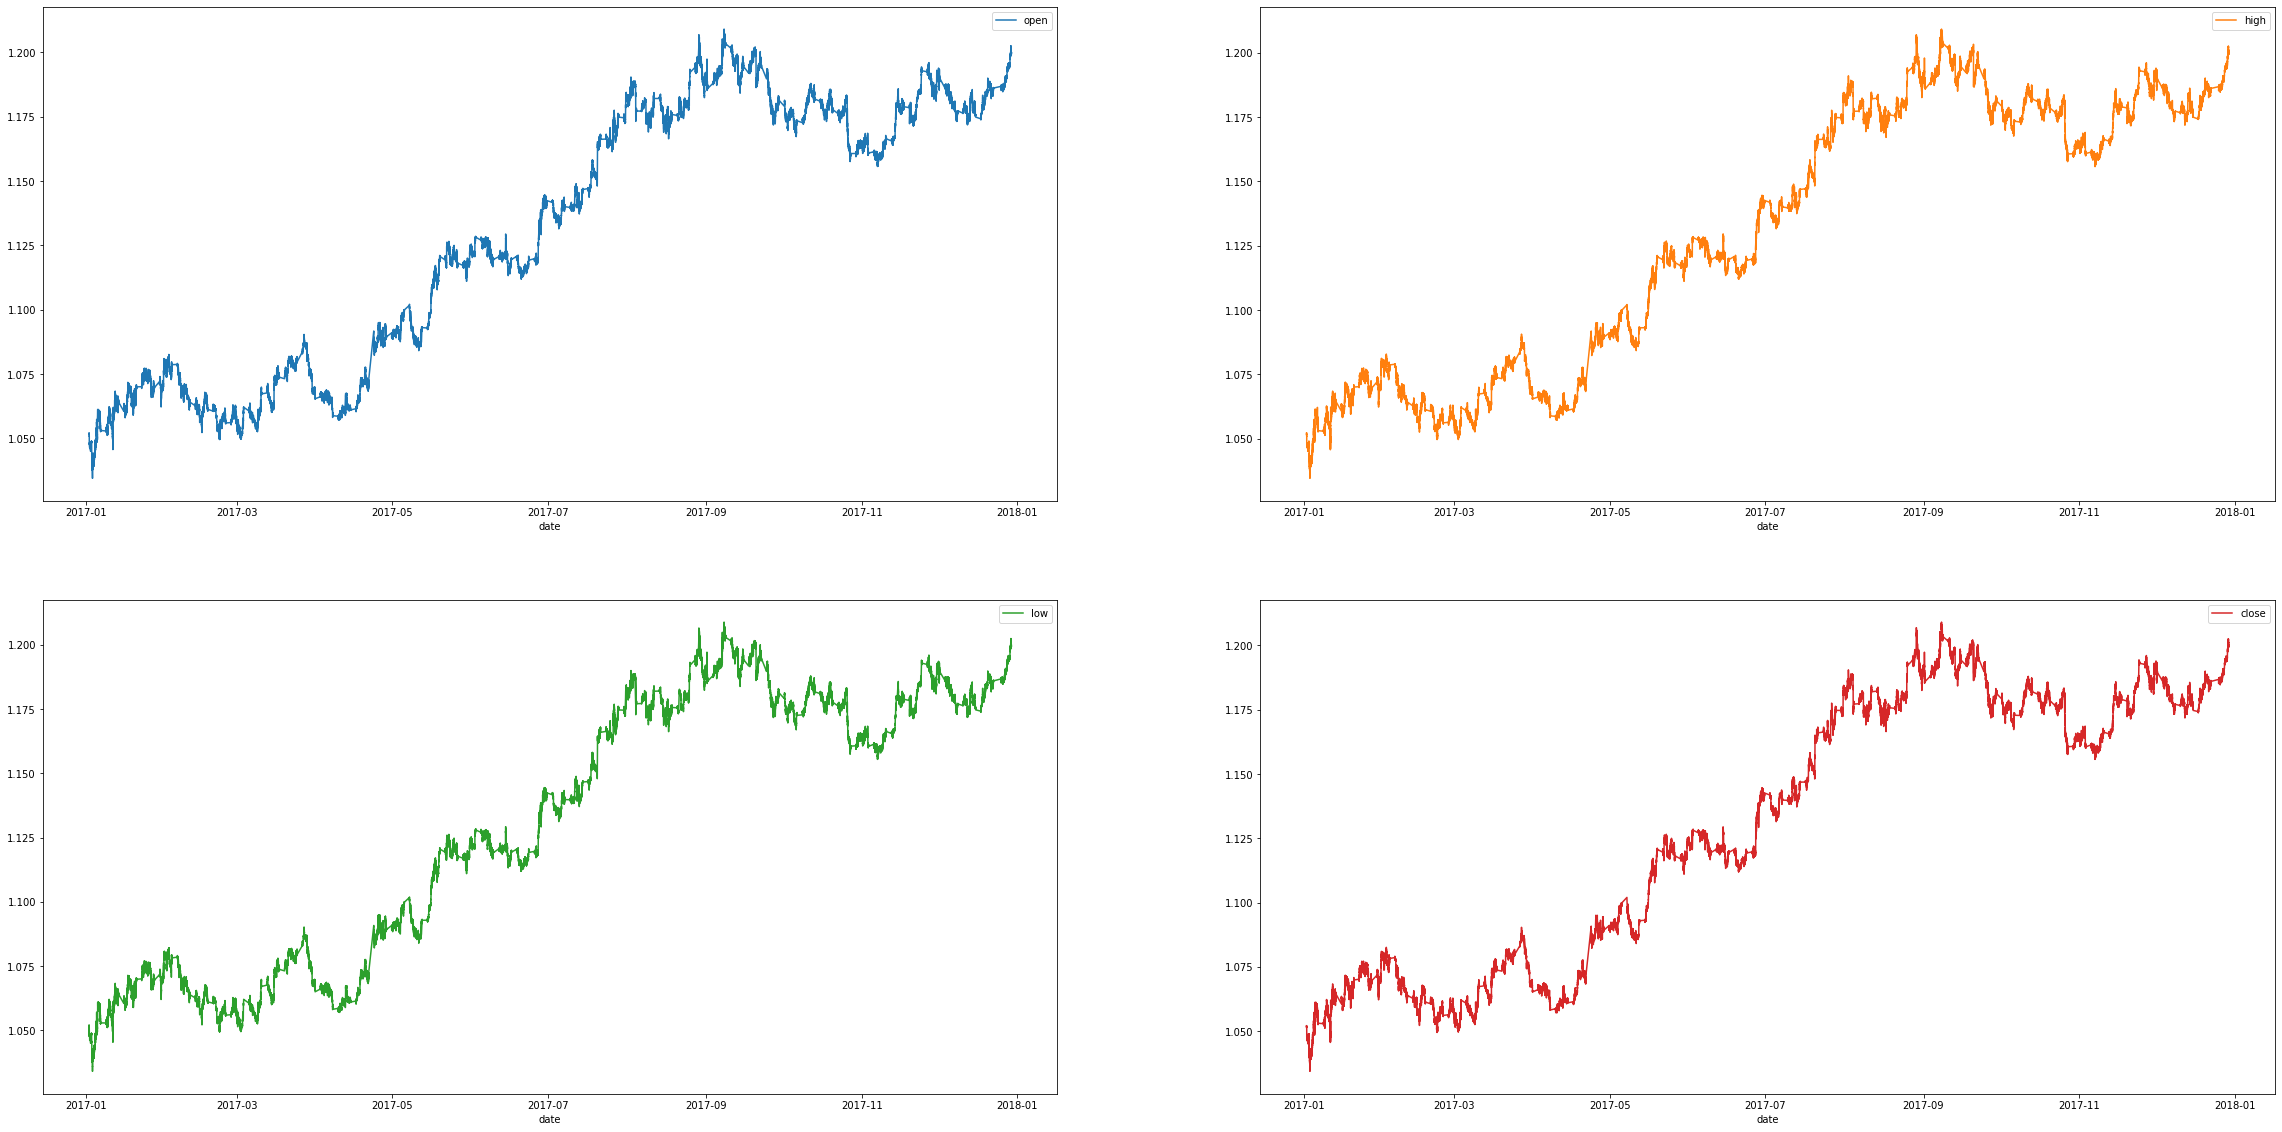

In [46]:
 if DO_PLOT:
     df.plot(subplots=True, layout=(2, 2), figsize=(40, 20), sharex=False)

In [47]:
data_set = df.iloc[:, 3].values #close
print(data_set)

[1.0519  1.05179 1.05178 ... 1.2001  1.19983 1.20005]


In [48]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set.reshape(-1,1))

In [49]:
print(data_set_scaled.reshape(1, -1)[0])

[0.10046368 0.09983399 0.09977675 ... 0.94882363 0.94727804 0.94853741]


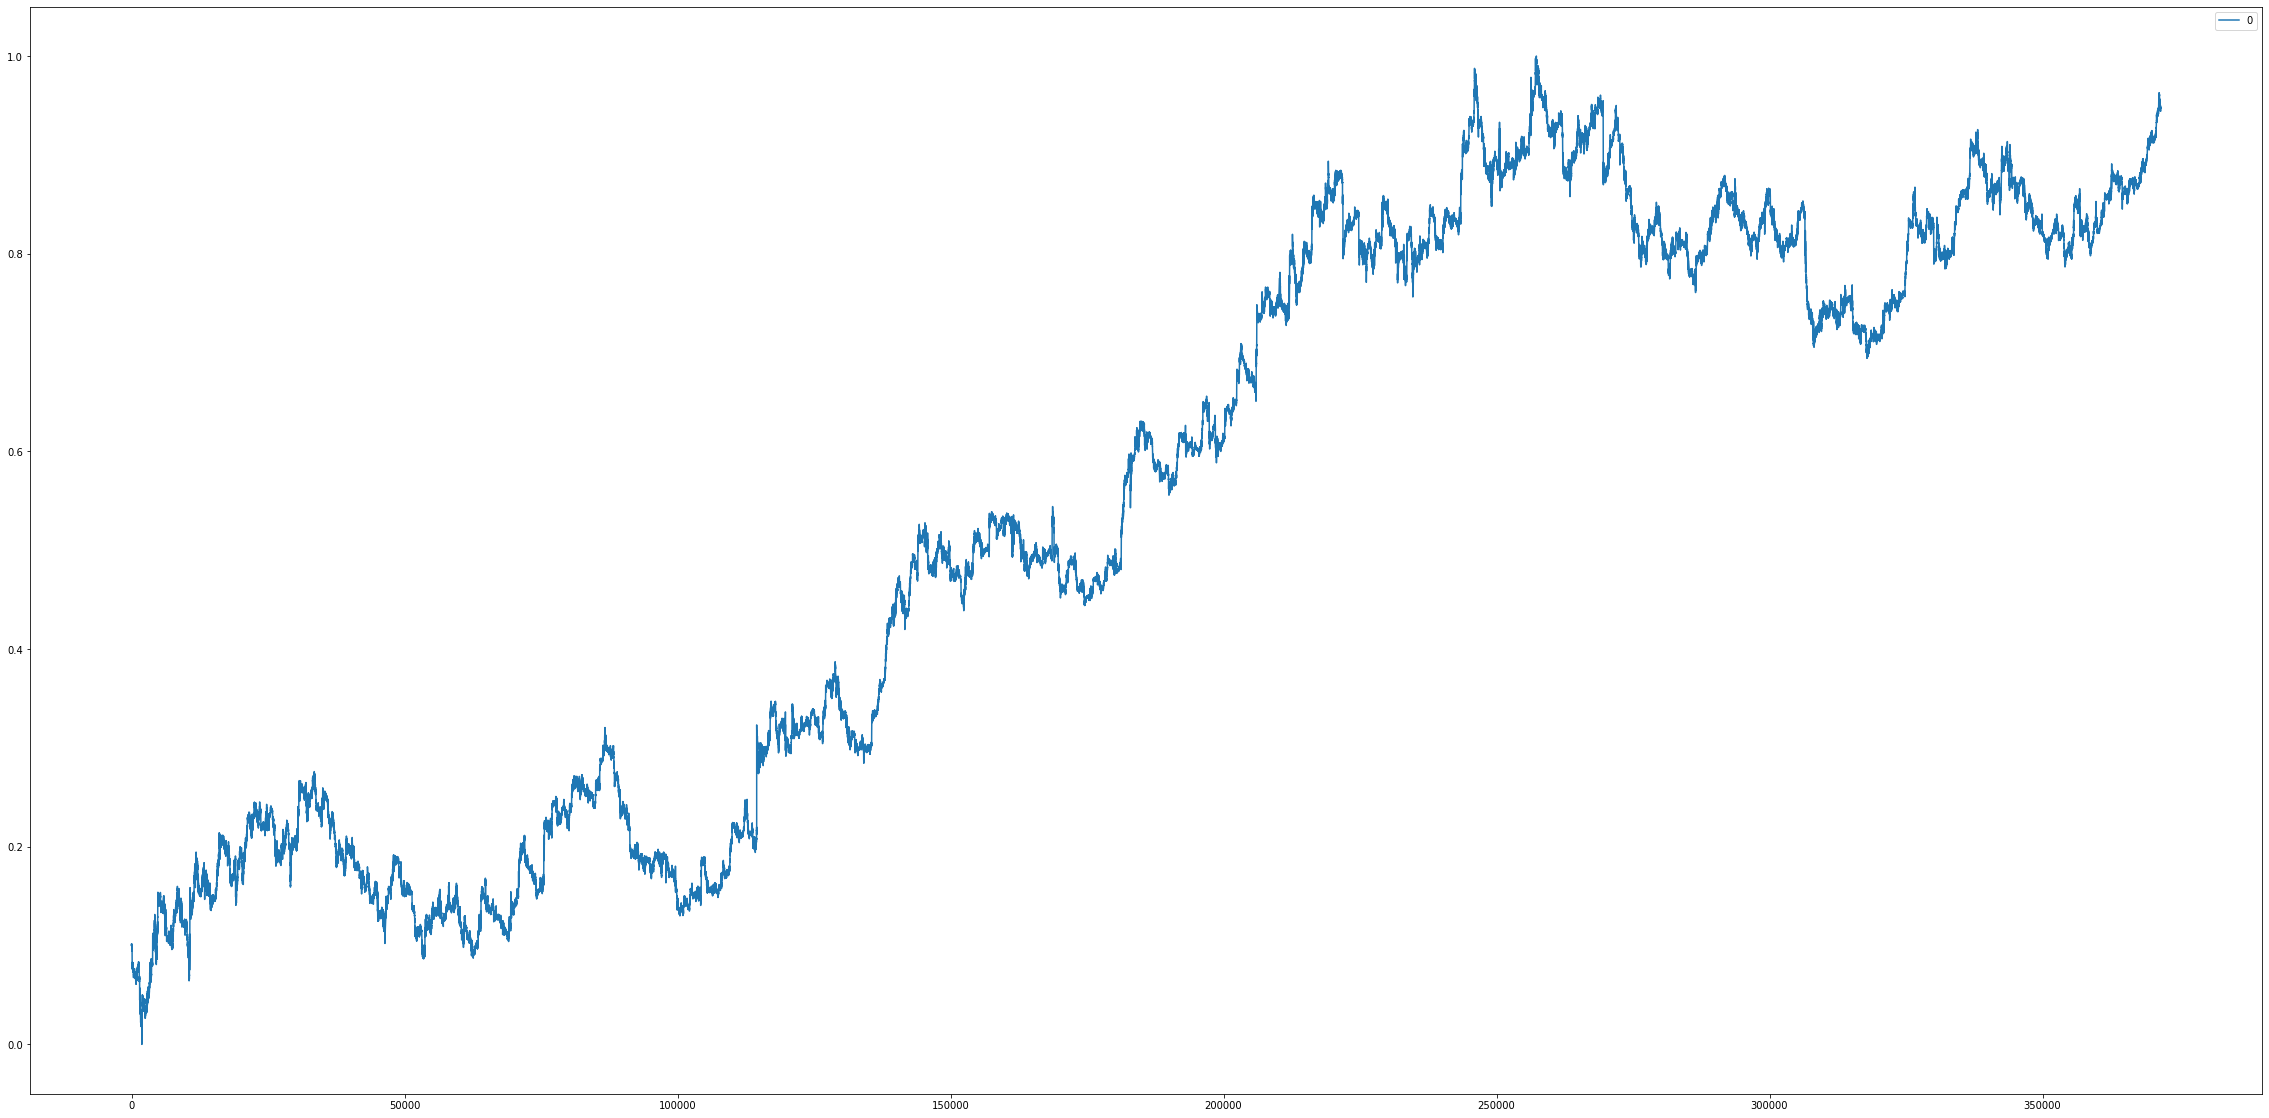

In [50]:
if DO_PLOT:
    pd.DataFrame(data=data_set_scaled.reshape(1, -1)[0]).plot(figsize=(40, 20), )

In [51]:
to_predict=data_set_scaled[:60]

chain_predict = np.array([to_predict])

output=[]

for i in range(SEQ_LEN,3500):
    if i%300==0:
        print(i)
    pred_val=model.predict(chain_predict)
    output.append(pred_val)

    stitched=np.concatenate((np.array(chain_predict[0][1:]),np.array(pred_val)))
    chain_predict=np.array([stitched])

300
600
900
1200
1500
1800
2100
2400
2700
3000
3300


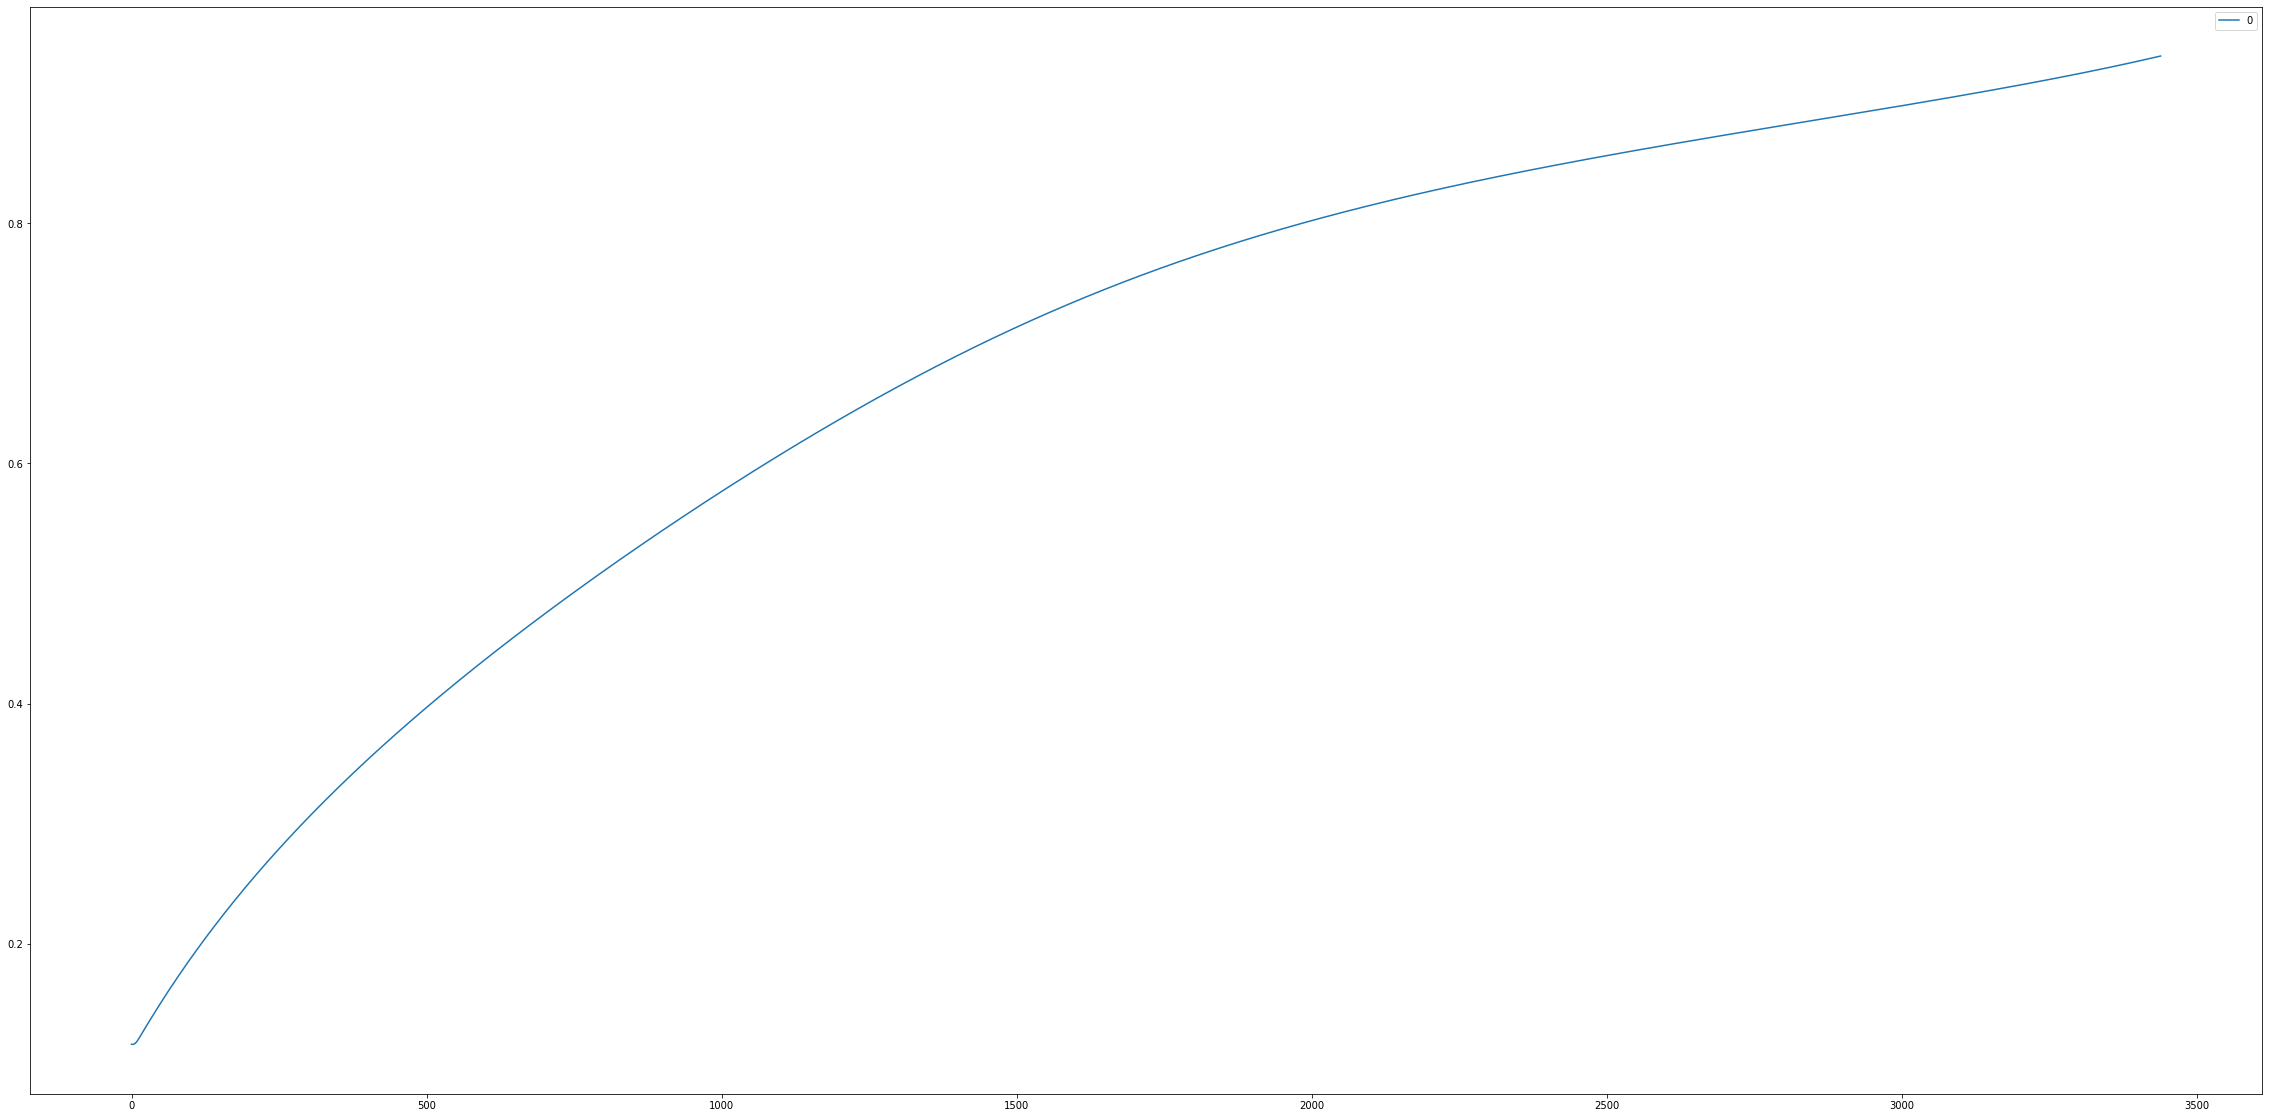

In [52]:

npoutput=np.array(output).reshape(1,-1)[0]


pd.DataFrame(data=npoutput).plot(figsize=(40, 20), )